In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

In [ ]:
root_dir = r"C:\Users\Lenovo\Documents\GitHub\cats_and_dogs_filtered"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%%capture hidden_output
# !unzip /content/drive/MyDrive/cats_and_dogs_filtered.zip

In [ ]:
root_dir = r"/content/cats_and_dogs_filtered"

In [ ]:
BATCH_SIZE  = 64
EPOCHS = 70

input_img_size = (128,128)
input_shape = (128,128,3)

dropout_rate = 0.2
initial_lr = 1e-4

In [ ]:
# Data Augmentation
tf_generator =  tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_ds = tf_generator.flow_from_directory(
    root_dir+"/train",
    target_size=input_img_size,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)
val_ds = tf_generator.flow_from_directory(
    root_dir+"/test",
    target_size=input_img_size,
    batch_size=BATCH_SIZE,
    class_mode= 'binary'
)

Found 2752 images belonging to 2 classes.
Found 248 images belonging to 2 classes.


In [ ]:
model = Sequential([

    Input(shape=input_shape),

    Conv2D(64, (3, 3), activation='relu', padding='same'),  # 1. Conv2D
    Conv2D(64, (3, 3), activation='relu',padding='same'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu',padding='same'),
    Conv2D(128, (3, 3), activation='relu',padding='same'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),


    Conv2D(256, (3, 3), activation='relu',padding='same'),
    Conv2D(256, (3, 3), activation='relu',padding='same'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),


    Conv2D(512, (3, 3), activation='relu',padding='same'),
    Conv2D(512, (3, 3), activation='relu',padding='same'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Flatten(),
    Dropout(dropout_rate),

    Dense(256, activation='relu'),
    Dropout(dropout_rate),


    Dense(128, activation='relu'),

    Dense(1, activation='sigmoid')  #

])

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy',
              optimizer = Adam(),
              metrics = ['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,111,105 (50.01 MB)

 Trainable params: 13,109,185 (50.01 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [ ]:
history = model.fit(train_ds,epochs=EPOCHS, validation_data=val_ds,verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/70
43/43 ━━━━━━━━━━━━━━━━━━━━ 71s 848ms/step - accuracy: 0.5202 - loss: 1.2942 - val_accuracy: 0.5282 - val_loss: 1.2260
Epoch 2/70
43/43 ━━━━━━━━━━━━━━━━━━━━ 18s 425ms/step - accuracy: 0.5666 - loss: 0.8726 - val_accuracy: 0.5524 - val_loss: 1.1531
Epoch 3/70
43/43 ━━━━━━━━━━━━━━━━━━━━ 19s 450ms/step - accuracy: 0.5549 - loss: 0.8625 - val_accuracy: 0.5121 - val_loss: 0.9935
Epoch 4/70
43/43 ━━━━━━━━━━━━━━━━━━━━ 19s 450ms/step - accuracy: 0.6165 - loss: 0.7190 - val_accuracy: 0.5161 - val_loss: 0.8696
Epoch 5/70
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 458ms/step - accuracy: 0.6179 - loss: 0.6914 - val_accuracy: 0.4798 - val_loss: 0.7724
Epoch 6/70
43/43 ━━━━━━━━━━━━━━━━━━━━ 19s 427ms/step - accuracy: 0.6538 - loss: 0.6514 - val_accuracy: 0.5726 - val_loss: 0.7070
Epoch 7/70
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 457ms/step - accuracy: 0.6295 - loss: 0.6469 - val_accuracy: 0.6371 - val_loss: 0.6472
Epoch 8/70
43/43 ━━━━━━━━━━━━━━━━━━━━ 19s 431ms/step - accuracy: 0.6642 - loss: 0.6308 - val_accu

In [ ]:
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 306ms/step - accuracy: 0.7964 - loss: 0.6220
Validation Loss: 0.6902
Validation Accuracy: 0.7944


In [ ]:
BATCH_SIZE
input_shape

(128, 128, 3)

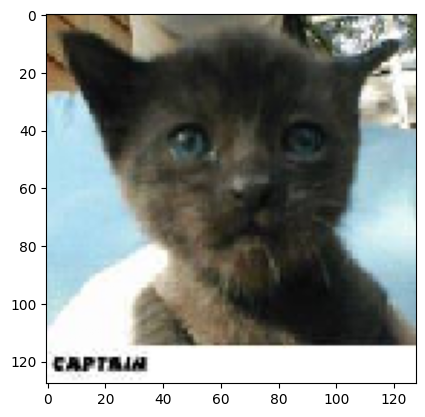

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r"/content/cats_and_dogs_filtered/test/cats/cat.2393.jpg"

img = image.load_img(img_path, target_size=input_img_size)
img_array = image.img_to_array(img)  # shape: (_, _, 3)
img_array = img_array / 255.0        # normalize

img_array = np.expand_dims(img_array, axis=0)  # shape: (1, _, _, 3)
plt.imshow(img_array[0])  # Display the image

In [ ]:
class_names = train_ds.class_indices

# Convert to dict
class_indices = {name: idx for idx, name in enumerate(class_names)}
print("Class names found:", class_indices)

Class names found: {'cats': 0, 'dogs': 1}


In [ ]:
class_names

{'cats': 0, 'dogs': 1}

In [ ]:
model.predict(img_array)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


np.float32(0.022954367)

In [ ]:
prediction = model.predict(img_array)[0][0]
class_name = "dogs" if prediction > 0.5 else "cats"

print(f"Predicted class: {class_name} with confidence {prediction:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted class: cats with confidence 0.02


### Model Saving

In [ ]:
model.save("ML006_Thant Sin Tun_model.h5")

In [5]:
import os
from dotenv.main import load_dotenv
load_dotenv()

ML_Summer_School_ID = os.getenv('ML_Summer_School_ID')
print("Your Student ID is: " + ML_Summer_School_ID)

Your Student ID is: ML006_Thant Sin Tun


In [ ]:
model.save(f'./binary_classification/{ML_Summer_School_ID}_model.h5')

In [ ]:
import json
# Save class names to a text file
with open(f'./binary_classification/{ML_Summer_School_ID}_class_indices.json', 'w') as f:
    class_names = train_ds.class_names

    # Convert to dict
    class_indices = {name: idx for idx, name in enumerate(class_names)}
    json.dump(class_indices, f)
